In [167]:
# speedup of resnet
import pandas as pd

path_ecr = "singleECR.txt"
path_pecr = "batchedECR.txt"

time_ecr = pd.read_csv(path_ecr, header = None, dtype = float)
time_pecr = pd.read_csv(path_pecr, header = None, dtype = float)

time_ocpa_ecr = []
time_ocpa_pecr = []
for i in range(0, 47):
    time_ocpa_ecr.append(time_ecr.iat[i, 0])
for i in range(0,47):
    time_ocpa_pecr.append(time_pecr.iat[i, 0])

In [168]:
path_cu_gemm = "cuDNN_gemm.txt"
path_cu_imp = "cuDNN_imp_gemm.txt"
path_cu_fft = "cuDNN_fft.txt"

time_gemm = pd.read_csv(path_cu_gemm, header=None, dtype=float)
time_imp = pd.read_csv(path_cu_imp, header=None, dtype=float)
time_fft = pd.read_csv(path_cu_fft, header=None, dtype=float)

time_cudnn_gemm = []
time_cudnn_imp = []
time_cudnn_fft = []

for i in range(0, 47):
    time_cudnn_gemm.append(time_gemm.iat[i, 0])
for i in range(0, 47):
    time_cudnn_imp.append(time_imp.iat[i, 0])
for i in range(0, 47):
    time_cudnn_fft.append(time_fft.iat[i, 0])


print("CUDNN GEMM")
print(time_cudnn_gemm)
print("CUDNN IMPLICIT GEMM")
print(time_cudnn_imp)
print("CUDNN FFT")
print(time_cudnn_fft)

CUDNN GEMM
[0.591488, 0.556512, 0.600864, 0.521696, 0.561472, 0.51952, 0.541568, 0.52384, 0.648832, 0.839616, 0.542048, 0.542144, 0.600512, 0.51696, 0.522432, 0.60672, 0.517504, 0.505792, 0.51184, 0.520064, 0.520576, 0.506784, 0.560256, 0.511968, 0.571264, 0.746624, 0.548608, 0.654208, 0.645408, 0.521728, 0.524352, 0.52192, 0.512096, 0.522912, 0.577408, 0.545984, 0.704896, 0.526496, 0.519776, 0.574656, 0.503264, 0.540352, 0.534624, 0.52304, 0.536448, 0.602144, 0.52032]
CUDNN IMPLICIT GEMM
[0.525024, 0.530272, 0.572384, 0.54144, 0.568928, 0.499328, 0.547968, 0.70992, 0.563328, 0.536448, 0.589344, 0.548896, 0.526208, 0.51936, 0.515296, 0.499296, 0.531168, 0.732832, 0.610144, 0.712736, 0.530144, 0.6056, 0.510528, 0.545408, 0.685088, 0.907584, 0.539264, 0.546336, 0.533856, 0.575104, 0.533408, 0.629664, 0.699456, 0.560448, 0.622912, 0.67872, 0.530592, 0.53872, 0.621344, 0.533664, 0.557856, 0.600704, 0.57008, 0.538848, 0.657088, 0.600992, 0.68816]
CUDNN FFT
[0.602688, 0.625952, 0.586336, 0.5

In [169]:
times_cudnn_gemm_vs_ecr = []
times_cudnn_imp_vs_ecr = []
times_cudnn_fft_vs_ecr = []

times_cudnn_gemm_vs_pecr = []
times_cudnn_imp_vs_pecr = []
times_cudnn_fft_vs_pecr = []

for i in range(0, 47):
    times_cudnn_gemm_vs_ecr.append(time_cudnn_gemm[i]/time_ocpa_ecr[i])
    times_cudnn_gemm_vs_pecr.append(time_cudnn_gemm[i]/time_ocpa_pecr[i])

for i in range(0, 47):
    times_cudnn_imp_vs_ecr.append(time_cudnn_imp[i]/time_ocpa_ecr[i])
    times_cudnn_imp_vs_pecr.append(time_cudnn_imp[i]/time_ocpa_pecr[i])

for i in range(0, 47):
    times_cudnn_fft_vs_ecr.append(time_cudnn_fft[i]/time_ocpa_ecr[i])
    times_cudnn_fft_vs_pecr.append(time_cudnn_fft[i]/time_ocpa_pecr[i])

print("SPEED UP VALUES OF ECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_ecr)

print("SPEED UP VALUES OF PECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_pecr)

SPEED UP VALUES OF ECR OVER CUDNN GEMM
[3.566274358479645, 3.2579617834394905, 3.6431897555296855, 3.175496688741722, 3.2999811924017304, 3.0075954057058167, 3.1734483405212828, 3.013622974963181, 2.7418526031102095, 4.475183353232134, 2.495433117265763, 3.327179890023566, 3.6192864030858245, 3.088910133843212, 2.9923020527859236, 3.719835197174809, 2.5912514020189072, 3.168169973942674, 3.2790077900779004, 3.0543130990415333, 3.3597686906237096, 3.1212061489948755, 3.5023004600920182, 3.0808781051415366, 3.0043756311006393, 4.578492935635793, 3.253130929791271, 3.959713344954484, 4.032993401319736, 3.2588446931840895, 3.343399306264028, 3.2457711442786072, 3.114029966919634, 3.2339204433010096, 3.4827253425979543, 2.999648382559775, 3.7577618560218355, 2.351436329855652, 3.135109052306505, 3.3972758229284903, 3.0837254901960787, 3.3799039231385115, 3.2649990228649597, 3.3995424292845255, 3.4657845772172835, 3.9292127792858635, 3.2637494981934965]
SPEED UP VALUES OF ECR OVER CUDNN IMPL

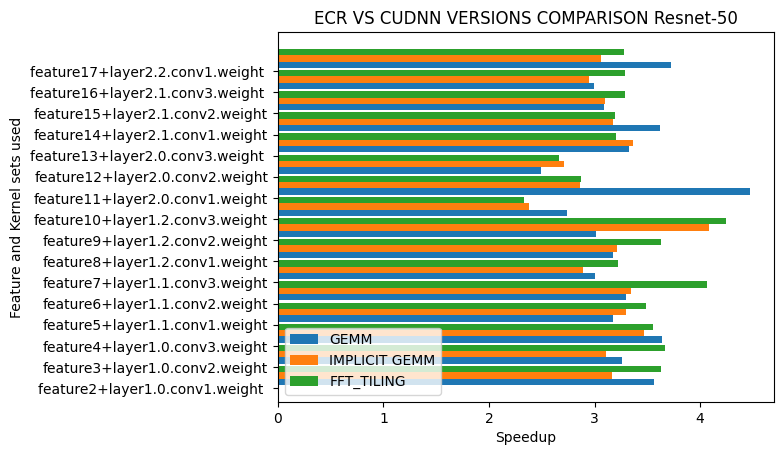

In [170]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_ecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_ecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_ecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("ECR VS CUDNN VERSIONS COMPARISON Resnet-50")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()

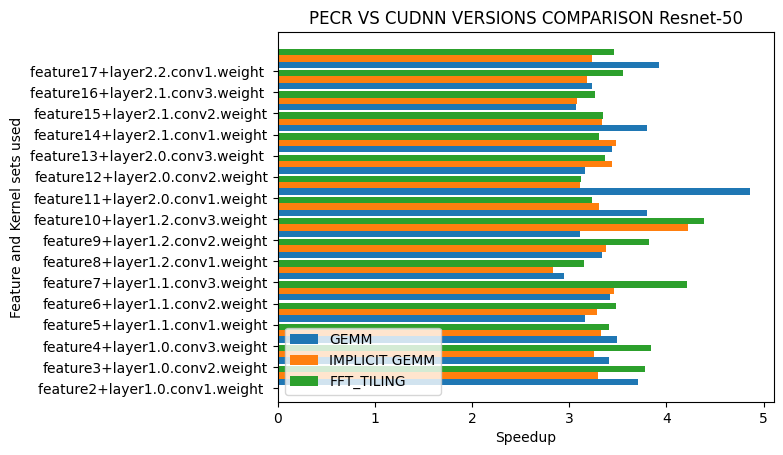

In [171]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_pecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_pecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_pecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("PECR VS CUDNN VERSIONS COMPARISON Resnet-50")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()